In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from Ipython.display import Image

In [14]:
Image("image_1.png")

NameError: name 'Image' is not defined

In [2]:

# 📌 Sample Data
data = {
    "Age": [25, 30, 35, 40, 22, 50, 45, 28, 32, 48],
    "Salary": [50000, 60000, 75000, 80000, 45000, 90000, 85000, 55000, 70000, 88000],
    "Experience": [2, 5, 7, 10, 1, 15, 12, 3, 8, 14],
    "Education_Level": [1, 2, 2, 3, 1, 3, 3, 1, 2, 3],
    "Loan_Approved": [0, 1, 1, 1, 0, 1, 1, 0, 1, 1]  # Target Variable
}

df = pd.DataFrame(data)

In [3]:
# 📌 Define Features & Target
X = df.drop(columns=["Loan_Approved"])  # Features
y = df["Loan_Approved"]  # Target

# 📌 Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# 📌 Get Feature Importance
dt_importance = dt_model.feature_importances_
dt_importance

array([1., 0., 0., 0.])

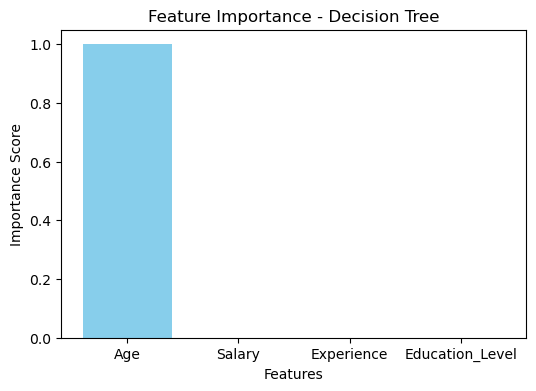

In [9]:

# 📌 Plot Feature Importance
plt.figure(figsize=(6, 4))
plt.bar(X.columns, dt_importance, color="skyblue")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance - Decision Tree")
plt.show()

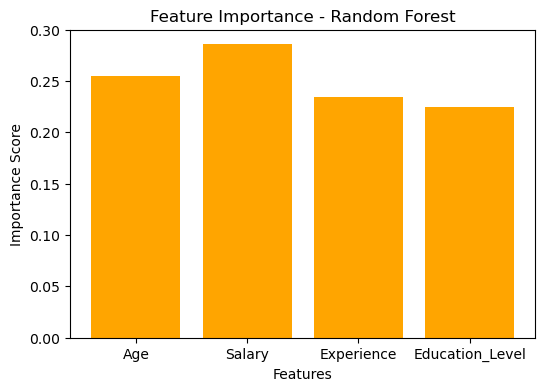

In [10]:
# 📌 Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 📌 Get Feature Importance
rf_importance = rf_model.feature_importances_

# 📌 Plot Feature Importance
plt.figure(figsize=(6, 4))
plt.bar(X.columns, rf_importance, color="orange")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.show()

In [11]:
# 📌 Convert to DataFrame for Better Visualization
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Decision Tree Importance": dt_importance,
    "Random Forest Importance": rf_importance
}).sort_values(by="Random Forest Importance", ascending=False)

print(feature_importance_df)

           Feature  Decision Tree Importance  Random Forest Importance
1           Salary                       0.0                  0.285714
0              Age                       1.0                  0.255102
2       Experience                       0.0                  0.234694
3  Education_Level                       0.0                  0.224490
